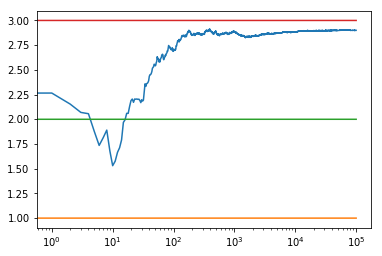

1.0334058704549693
2.0017355634795884
2.996680155230859


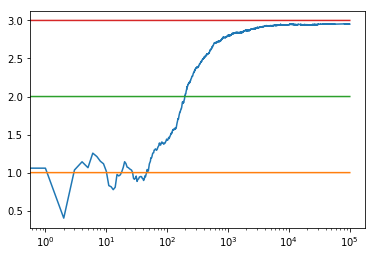

0.9753776748428447
2.010522789330578
3.002829919637117


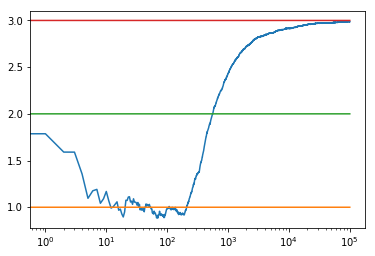

0.9529587217455928
2.0450256236762487
3.002169270409915


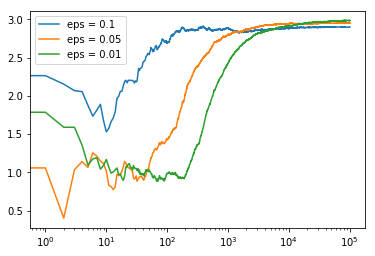

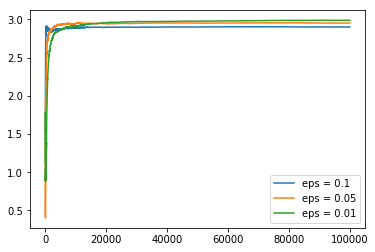

In [2]:
#revised/commented code- Cyrus

# https://deeplearningcourses.com/c/artificial-intelligence-reinforcement-learning-in-python
# https://www.udemy.com/artificial-intelligence-reinforcement-learning-in-python

from __future__ import print_function, division #https://stackoverflow.com/questions/7075082/what-is-future-in-python-used-for-and-how-when-to-use-it-and-how-it-works
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future

import numpy as np
import matplotlib.pyplot as plt


class Bandit: #object oriented
  def __init__(self, m):
    self.m = m
    self.mean = 0
    self.N = 0

  def pull(self):
    return np.random.randn() + self.m

  def update(self, x):
    self.N += 1
    self.mean = (1 - 1.0/self.N)*self.mean + 1.0/self.N*x


def run_experiment(m1, m2, m3, eps, N):
  bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]

  data = np.empty(N)
  
  for i in range(N):
    # epsilon greedy
    p = np.random.random()
    if p < eps:
      j = np.random.choice(3)
    else:
      j = np.argmax([b.mean for b in bandits])
    x = bandits[j].pull()
    bandits[j].update(x)

    # for the plot
    data[i] = x
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

  # plot moving average ctr
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.plot(np.ones(N)*m3)
  plt.xscale('log')
  plt.show()

  for b in bandits:
    print(b.mean)

  return cumulative_average

if __name__ == '__main__':
  c_1 = run_experiment(1.0, 2.0, 3.0, 0.1, 100000)
  c_05 = run_experiment(1.0, 2.0, 3.0, 0.05, 100000)
  c_01 = run_experiment(1.0, 2.0, 3.0, 0.01, 100000)

  # log scale plot
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(c_05, label='eps = 0.05')
  plt.plot(c_01, label='eps = 0.01')
  plt.legend()
  plt.xscale('log')
  plt.show()


  # linear plot
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(c_05, label='eps = 0.05')
  plt.plot(c_01, label='eps = 0.01')
  plt.legend()
  plt.show()
